In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


In [3]:
df=pd.read_csv("Downloads/Classified Data.txt",index_col=0)

In [4]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [7]:
scaler=StandardScaler()
scaler.fit(df.iloc[:,:-1])

StandardScaler()

In [8]:
scaledX=scaler.transform(df.iloc[:,:-1])

In [13]:
scaled_df=pd.DataFrame(scaledX,columns=df.columns[:-1])

In [15]:
scaled_df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(scaled_df,df["TARGET CLASS"],test_size=0.2,random_state=0)

In [19]:
xtrain.shape,xtest.shape

((800, 10), (200, 10))

In [37]:
model=KNeighborsClassifier(n_neighbors=10)
#yet not decided k 

In [38]:
model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=10)

In [39]:
ypred=model.predict(xtest)

In [40]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [41]:
accuracy_score(ytest,ypred)

0.94

In [42]:
confusion_matrix(ytest,ypred)

array([[ 80,   6],
       [  6, 108]], dtype=int64)

In [43]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        86
           1       0.95      0.95      0.95       114

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



In [29]:
#choosing k value

In [30]:
error_rate=[]


In [31]:
for i in range(1,40):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    error_rate.append(np.mean(ypred!=ytest))

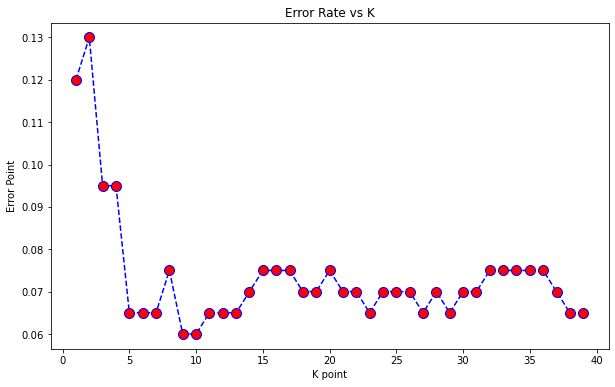

In [45]:
plt.figure(figsize=(10,6))
plt.title("Error Rate vs K")
plt.xlabel("K point")
plt.ylabel("Error Point")
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)